In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_elevator = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/house1004-2.csv') 
df_elevator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 70 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     240149 non-null  int64  
 1   Column1        240149 non-null  int64  
 2   鄉鎮市區           240130 non-null  object 
 3   交易標的           240149 non-null  object 
 4   土地位置建物門牌       240149 non-null  object 
 5   土地移轉總面積平方公尺    240149 non-null  float64
 6   都市土地使用分區       218861 non-null  object 
 7   非都市土地使用分區      20391 non-null   object 
 8   非都市土地使用編定      20373 non-null   object 
 9   交易年月日          238012 non-null  object 
 10  交易筆棟數          240149 non-null  object 
 11  移轉層次           239998 non-null  object 
 12  總樓層數           239739 non-null  object 
 13  建物型態           240149 non-null  object 
 14  主要用途           239742 non-null  object 
 15  主要建材           239739 non-null  object 
 16  建築完成年月         212738 non-null  float64
 17  建物移轉總面積平方公尺    240149 non-nul

In [3]:
df_elevator['電梯_數值化'].unique

<bound method Series.unique of 0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
240144    1.0
240145    1.0
240146    1.0
240147    1.0
240148    0.0
Name: 電梯_數值化, Length: 240149, dtype: float64>

In [4]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/house1004.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 68 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     240149 non-null  int64  
 1   Column1        240149 non-null  int64  
 2   鄉鎮市區           240130 non-null  object 
 3   交易標的           240149 non-null  object 
 4   土地位置建物門牌       240149 non-null  object 
 5   土地移轉總面積平方公尺    240149 non-null  float64
 6   都市土地使用分區       218861 non-null  object 
 7   非都市土地使用分區      20391 non-null   object 
 8   非都市土地使用編定      20373 non-null   object 
 9   交易年月日          238012 non-null  object 
 10  交易筆棟數          240149 non-null  object 
 11  移轉層次           239998 non-null  object 
 12  總樓層數           239739 non-null  object 
 13  建物型態           240149 non-null  object 
 14  主要用途           239742 non-null  object 
 15  主要建材           239739 non-null  object 
 16  建築完成年月         212738 non-null  float64
 17  建物移轉總面積平方公尺    240149 non-nul

In [5]:
df_2 = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/kde_results.csv') 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240133 entries, 0 to 240132
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   編號         240133 non-null  object 
 1   KDE_0.5km  240133 non-null  float64
 2   KDE_1km    240133 non-null  float64
 3   KDE_1.5km  240133 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.3+ MB


In [6]:
df_2.head()

,編號,KDE_0.5km,KDE_1km,KDE_1.5km
0,RPPPMLRLKHIFFHR07CA,0.010250,0.003468,0.001877
1,RPSPMLQLLHIFFHR37CA,0.010201,0.003466,0.001877
2,RPXNMLNKNHIFFAD97CA,0.010899,0.003453,0.001855
3,RPWNMLKMQHHFFHR47CA,0.010163,0.003474,0.001881
4,RPTOMLNJRHHFFHR37CA,0.010264,0.003471,0.001878


In [7]:
df = df.merge(df_2, on='編號', how='left')

In [8]:
df.head()

,Unnamed: 0,Column1,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,...,商,工,農,移轉層次_數字,包含騎樓_編碼,包含屋頂_編碼,包含一二樓_編碼,KDE_0.5km,KDE_1km,KDE_1.5km
0,0,0,中西區,房地(土地+建物),臺南市中西區金華路三段２１８號十五樓之１７,4.11,商,NaN,NaN,2022/9/2 00:00,...,1,0,0,15,0,0,0,0.003601,0.001542,0.000867
1,1,1,北區,房地(土地+建物),臺南市北區南園街１２７巷１５１弄３號,52.00,住,NaN,NaN,2022/8/1 00:00,...,0,0,0,全,0,0,0,0.003506,0.001622,0.000910
2,2,2,佳里區,房地(土地+建物),臺南市佳里區麻興路二段５３１號,314.27,NaN,鄉村區,乙種建築用地,2022/8/4 00:00,...,0,0,0,全,0,0,0,0.000497,0.000467,0.000462
3,3,3,新化區,房地(土地+建物),臺南市新化區中正路６６２巷２２號,61.00,NaN,特定農業區,甲種建築用地,2022/8/1 00:00,...,0,0,0,全,0,0,0,0.000897,0.000846,0.000645
4,4,4,中西區,房地(土地+建物),臺南市中西區南寧街１３６巷９號,62.86,住,NaN,NaN,2022/8/1 00:00,...,0,0,0,全,0,0,0,0.003568,0.001565,0.000875


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 71 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     240149 non-null  int64  
 1   Column1        240149 non-null  int64  
 2   鄉鎮市區           240130 non-null  object 
 3   交易標的           240149 non-null  object 
 4   土地位置建物門牌       240149 non-null  object 
 5   土地移轉總面積平方公尺    240149 non-null  float64
 6   都市土地使用分區       218861 non-null  object 
 7   非都市土地使用分區      20391 non-null   object 
 8   非都市土地使用編定      20373 non-null   object 
 9   交易年月日          238012 non-null  object 
 10  交易筆棟數          240149 non-null  object 
 11  移轉層次           239998 non-null  object 
 12  總樓層數           239739 non-null  object 
 13  建物型態           240149 non-null  object 
 14  主要用途           239742 non-null  object 
 15  主要建材           239739 non-null  object 
 16  建築完成年月         212738 non-null  float64
 17  建物移轉總面積平方公尺    240149 non-nul

In [10]:
df = pd.concat([df,df_elevator['電梯_數值化']], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 72 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     240149 non-null  int64  
 1   Column1        240149 non-null  int64  
 2   鄉鎮市區           240130 non-null  object 
 3   交易標的           240149 non-null  object 
 4   土地位置建物門牌       240149 non-null  object 
 5   土地移轉總面積平方公尺    240149 non-null  float64
 6   都市土地使用分區       218861 non-null  object 
 7   非都市土地使用分區      20391 non-null   object 
 8   非都市土地使用編定      20373 non-null   object 
 9   交易年月日          238012 non-null  object 
 10  交易筆棟數          240149 non-null  object 
 11  移轉層次           239998 non-null  object 
 12  總樓層數           239739 non-null  object 
 13  建物型態           240149 non-null  object 
 14  主要用途           239742 non-null  object 
 15  主要建材           239739 non-null  object 
 16  建築完成年月         212738 non-null  float64
 17  建物移轉總面積平方公尺    240149 non-nul

In [11]:
df_columns_cleaned = df.drop(columns=['Unnamed: 0', 'Column1', '交易標的', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元', '主建物面積', '附屬建物面積', '陽台面積', '移轉編號', '車位移轉總面積平方公尺', '建案名稱', '棟及號', '解約情形','移轉層次_數字','電梯'])
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         240130 non-null  object 
 1   土地位置建物門牌     240149 non-null  object 
 2   交易年月日        238012 non-null  object 
 3   建築完成年月       212738 non-null  float64
 4   建物移轉總面積平方公尺  240149 non-null  float64
 5   有無管理組織       240149 non-null  object 
 6   總價元          240149 non-null  int64  
 7   單價元平方公尺      238544 non-null  float64
 8   備註           65433 non-null   object 
 9   編號           240149 non-null  object 
 10  緯度           240149 non-null  float64
 11  經度           240149 non-null  float64
 12  bad_count    238012 non-null  float64
 13  good_count   238012 non-null  float64
 14  建築型態清整       240149 non-null  object 
 15  陽台有無         240149 non-null  int64  
 16  是否含額外土地      240149 non-null  int64  
 17  建築型態_住商大樓    240149 non-null  int64  
 18  建築型態_公寓      240149 non-

In [12]:
# 使用 rename 方法重命名欄位
df_columns_cleaned = df_columns_cleaned.rename(columns={
    '包含騎樓_編碼': '移轉層次_騎樓',
    '包含屋頂_編碼': '移轉層次_屋頂',
    '包含一二樓_編碼': '移轉層次_一二樓',
    '電梯_數值化':'有無電梯'
})
df_columns_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         240130 non-null  object 
 1   土地位置建物門牌     240149 non-null  object 
 2   交易年月日        238012 non-null  object 
 3   建築完成年月       212738 non-null  float64
 4   建物移轉總面積平方公尺  240149 non-null  float64
 5   有無管理組織       240149 non-null  object 
 6   總價元          240149 non-null  int64  
 7   單價元平方公尺      238544 non-null  float64
 8   備註           65433 non-null   object 
 9   編號           240149 non-null  object 
 10  緯度           240149 non-null  float64
 11  經度           240149 non-null  float64
 12  bad_count    238012 non-null  float64
 13  good_count   238012 non-null  float64
 14  建築型態清整       240149 non-null  object 
 15  陽台有無         240149 non-null  int64  
 16  是否含額外土地      240149 non-null  int64  
 17  建築型態_住商大樓    240149 non-null  int64  
 18  建築型態_公寓      240149 non-

In [13]:
df_3= pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/house1016_withKDE_Regioin.csv')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237834 entries, 0 to 237833
Data columns (total 39 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         237834 non-null  object 
 1   土地位置建物門牌     237834 non-null  object 
 2   交易年月日        237834 non-null  object 
 3   建物移轉總面積平方公尺  237834 non-null  float64
 4   有無管理組織       237834 non-null  object 
 5   總價元          237834 non-null  int64  
 6   單價元平方公尺      236230 non-null  float64
 7   編號           237834 non-null  object 
 8   電梯           74518 non-null   object 
 9   緯度           237834 non-null  float64
 10  經度           237834 non-null  float64
 11  bad_count    237834 non-null  float64
 12  good_count   237834 non-null  float64
 13  建築型態清整       237834 non-null  object 
 14  陽台有無         237834 non-null  int64  
 15  是否含額外土地      237834 non-null  int64  
 16  建築型態_住商大樓    237834 non-null  int64  
 17  建築型態_公寓      237834 non-null  int64  
 18  建築型態_其他      237834 non-

In [14]:
# 提取需要的列
df_region = df_3[['編號', 'Region']]

# 合并 'Region' 列到 df
df_columns_cleaned = df_columns_cleaned.merge(df_region, on='編號', how='left')

df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         240130 non-null  object 
 1   土地位置建物門牌     240149 non-null  object 
 2   交易年月日        238012 non-null  object 
 3   建築完成年月       212738 non-null  float64
 4   建物移轉總面積平方公尺  240149 non-null  float64
 5   有無管理組織       240149 non-null  object 
 6   總價元          240149 non-null  int64  
 7   單價元平方公尺      238544 non-null  float64
 8   備註           65433 non-null   object 
 9   編號           240149 non-null  object 
 10  緯度           240149 non-null  float64
 11  經度           240149 non-null  float64
 12  bad_count    238012 non-null  float64
 13  good_count   238012 non-null  float64
 14  建築型態清整       240149 non-null  object 
 15  陽台有無         240149 non-null  int64  
 16  是否含額外土地      240149 non-null  int64  
 17  建築型態_住商大樓    240149 non-null  int64  
 18  建築型態_公寓      240149 non-

# 空缺值欄位處理
## 鄉鎮市區、交易年月日、單價元平方公尺、

In [15]:
df_columns_cleaned.isna().sum()

鄉鎮市區               19
土地位置建物門牌            0
交易年月日            2137
建築完成年月          27411
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺          1605
備註             174716
編號                  0
緯度                  0
經度                  0
bad_count        2137
good_count       2137
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4769
格局比例_廳           4769
格局比例_衛           4769
格局比例_隔間          4769
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km          16
KDE_1km            16
KDE_1.5km          16
有無電梯                0
Region          14447
dtype: int64

In [16]:
# 篩選出 '鄉鎮市區' 為 NaN 的 '土地位置建物門牌' 欄位
nan_town_area = df_columns_cleaned[df_columns_cleaned['鄉鎮市區'].isna()][['鄉鎮市區','土地位置建物門牌']]

# 顯示結果
print(nan_town_area)

       鄉鎮市區               土地位置建物門牌
204016  NaN  臺南市官田區隆本里和平街二段26巷1弄3號
218820  NaN               臺南市東區平實路
218822  NaN               臺南市東區平實路
218824  NaN               臺南市東區平實路
218828  NaN               臺南市東區平實路
218829  NaN               臺南市東區平實路
218832  NaN               臺南市東區平實路
218974  NaN               臺南市東區平實路
219117  NaN               臺南市東區平實路
219118  NaN               臺南市東區平實路
219119  NaN               臺南市東區平實路
219120  NaN               臺南市東區平實路
219121  NaN               臺南市東區平實路
219122  NaN               臺南市東區平實路
219123  NaN               臺南市東區平實路
219124  NaN               臺南市東區平實路
219125  NaN               臺南市東區平實路
219126  NaN               臺南市東區平實路
219127  NaN               臺南市東區平實路


In [17]:
import re

# 定義一個函數來從 '土地位置建物門牌' 中提取 '市' 後面的區域
def extract_district(address):
    match = re.search(r'市(.+?區)', address)
    if match:
        return match.group(1)
    return None

# 將 '鄉鎮市區' 欄位為 NaN 的行補充 '土地位置建物門牌' 中的區域名稱
df_columns_cleaned.loc[df_columns_cleaned['鄉鎮市區'].isna(), '鄉鎮市區'] = df_columns_cleaned['土地位置建物門牌'].apply(extract_district)

# 檢查結果
print(df_columns_cleaned[['鄉鎮市區', '土地位置建物門牌']].head())

  鄉鎮市區               土地位置建物門牌
0  中西區  臺南市中西區金華路三段２１８號十五樓之１７
1   北區     臺南市北區南園街１２７巷１５１弄３號
2  佳里區        臺南市佳里區麻興路二段５３１號
3  新化區       臺南市新化區中正路６６２巷２２號
4  中西區        臺南市中西區南寧街１３６巷９號


In [18]:
df_columns_cleaned.isna().sum()

鄉鎮市區                0
土地位置建物門牌            0
交易年月日            2137
建築完成年月          27411
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺          1605
備註             174716
編號                  0
緯度                  0
經度                  0
bad_count        2137
good_count       2137
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4769
格局比例_廳           4769
格局比例_衛           4769
格局比例_隔間          4769
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km          16
KDE_1km            16
KDE_1.5km          16
有無電梯                0
Region          14447
dtype: int64

In [19]:
# 篩選出 '交易年月日' 為 NaN 的行
nan_deal_date = df_columns_cleaned[df_columns_cleaned['交易年月日'].isna()][['交易年月日', '建築完成年月']]

# 從 df_columns_cleaned 中移除這些行
df_columns_cleaned = df_columns_cleaned.drop(nan_deal_date.index)


In [20]:
# 找出 [單價元平方公尺] 為 NaN 或者為 0 的行
mask = (df_columns_cleaned['單價元平方公尺'].isna()) | (df_columns_cleaned['單價元平方公尺'] == 0)

# 計算 [房地總價元] / [建物移轉總面積平方公尺]，針對滿足條件的行進行計算
df_columns_cleaned.loc[mask, '單價元平方公尺'] = df_columns_cleaned.loc[mask, '房地總價元'] / df_columns_cleaned.loc[mask, '建物移轉總面積平方公尺']

# 查看更新後的數據
print(df_columns_cleaned[mask][['房地總價元', '建物移轉總面積平方公尺', '單價元平方公尺']].head())

         房地總價元  建物移轉總面積平方公尺       單價元平方公尺
1133  38130000       629.70  60552.644116
1140  11700000       197.28  59306.569343
1305   9511976       334.47  28438.951176
1791   1800000        82.52  21812.893844
1937  41580000       865.86  48021.620123


In [21]:
df_columns_cleaned.isna().sum()

鄉鎮市區                0
土地位置建物門牌            0
交易年月日               0
建築完成年月          25275
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172613
編號                  0
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4757
格局比例_廳           4757
格局比例_衛           4757
格局比例_隔間          4757
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km          16
KDE_1km            16
KDE_1.5km          16
有無電梯                0
Region          12310
dtype: int64

In [22]:
# 換算坪數
conversion_factor = 3.305785

# 將「建物移轉總面積平方公尺」轉換成坪
df_columns_cleaned['建物移轉總面積坪'] = df_columns_cleaned['建物移轉總面積平方公尺'] * conversion_factor
# 將「單價元平方公尺」轉換成「單價元每坪」
df_columns_cleaned['單價元每坪'] = df_columns_cleaned['單價元平方公尺'] * conversion_factor
df_columns_cleaned['房地總價元(坪)'] = df_columns_cleaned['建物移轉總面積坪'] * df_columns_cleaned['單價元每坪']

In [23]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238012 entries, 0 to 238011
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         238012 non-null  object 
 1   土地位置建物門牌     238012 non-null  object 
 2   交易年月日        238012 non-null  object 
 3   建築完成年月       212737 non-null  float64
 4   建物移轉總面積平方公尺  238012 non-null  float64
 5   有無管理組織       238012 non-null  object 
 6   總價元          238012 non-null  int64  
 7   單價元平方公尺      238012 non-null  float64
 8   備註           65399 non-null   object 
 9   編號           238012 non-null  object 
 10  緯度           238012 non-null  float64
 11  經度           238012 non-null  float64
 12  bad_count    238012 non-null  float64
 13  good_count   238012 non-null  float64
 14  建築型態清整       238012 non-null  object 
 15  陽台有無         238012 non-null  int64  
 16  是否含額外土地      238012 non-null  int64  
 17  建築型態_住商大樓    238012 non-null  int64  
 18  建築型態_公寓      238012 non-

In [24]:
df_columns_cleaned.isna().sum()

鄉鎮市區                0
土地位置建物門牌            0
交易年月日               0
建築完成年月          25275
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172613
編號                  0
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4757
格局比例_廳           4757
格局比例_衛           4757
格局比例_隔間          4757
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km          16
KDE_1km            16
KDE_1.5km          16
有無電梯                0
Region          12310
建物移轉總面積坪            0
單價元每坪               0
房地總價元(坪)  

In [25]:
# 篩選出 '交易年月日' 為 NaN 的行
nan_total_price_sqm = df_columns_cleaned[df_columns_cleaned['房地總價元(坪)'].isna()][['建物移轉總面積坪','單價元平方公尺','單價元每坪', '房地總價元(坪)']]
# nan_total_price_sqm
# 從 df_columns_cleaned 中移除這些行
df_columns_cleaned = df_columns_cleaned.drop(nan_total_price_sqm.index)

In [26]:
# df_columns_cleaned.isna().sum()
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238010 entries, 0 to 238011
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         238010 non-null  object 
 1   土地位置建物門牌     238010 non-null  object 
 2   交易年月日        238010 non-null  object 
 3   建築完成年月       212737 non-null  float64
 4   建物移轉總面積平方公尺  238010 non-null  float64
 5   有無管理組織       238010 non-null  object 
 6   總價元          238010 non-null  int64  
 7   單價元平方公尺      238010 non-null  float64
 8   備註           65398 non-null   object 
 9   編號           238010 non-null  object 
 10  緯度           238010 non-null  float64
 11  經度           238010 non-null  float64
 12  bad_count    238010 non-null  float64
 13  good_count   238010 non-null  float64
 14  建築型態清整       238010 non-null  object 
 15  陽台有無         238010 non-null  int64  
 16  是否含額外土地      238010 non-null  int64  
 17  建築型態_住商大樓    238010 non-null  int64  
 18  建築型態_公寓      238010 non-null 

# 清除2012年前數據

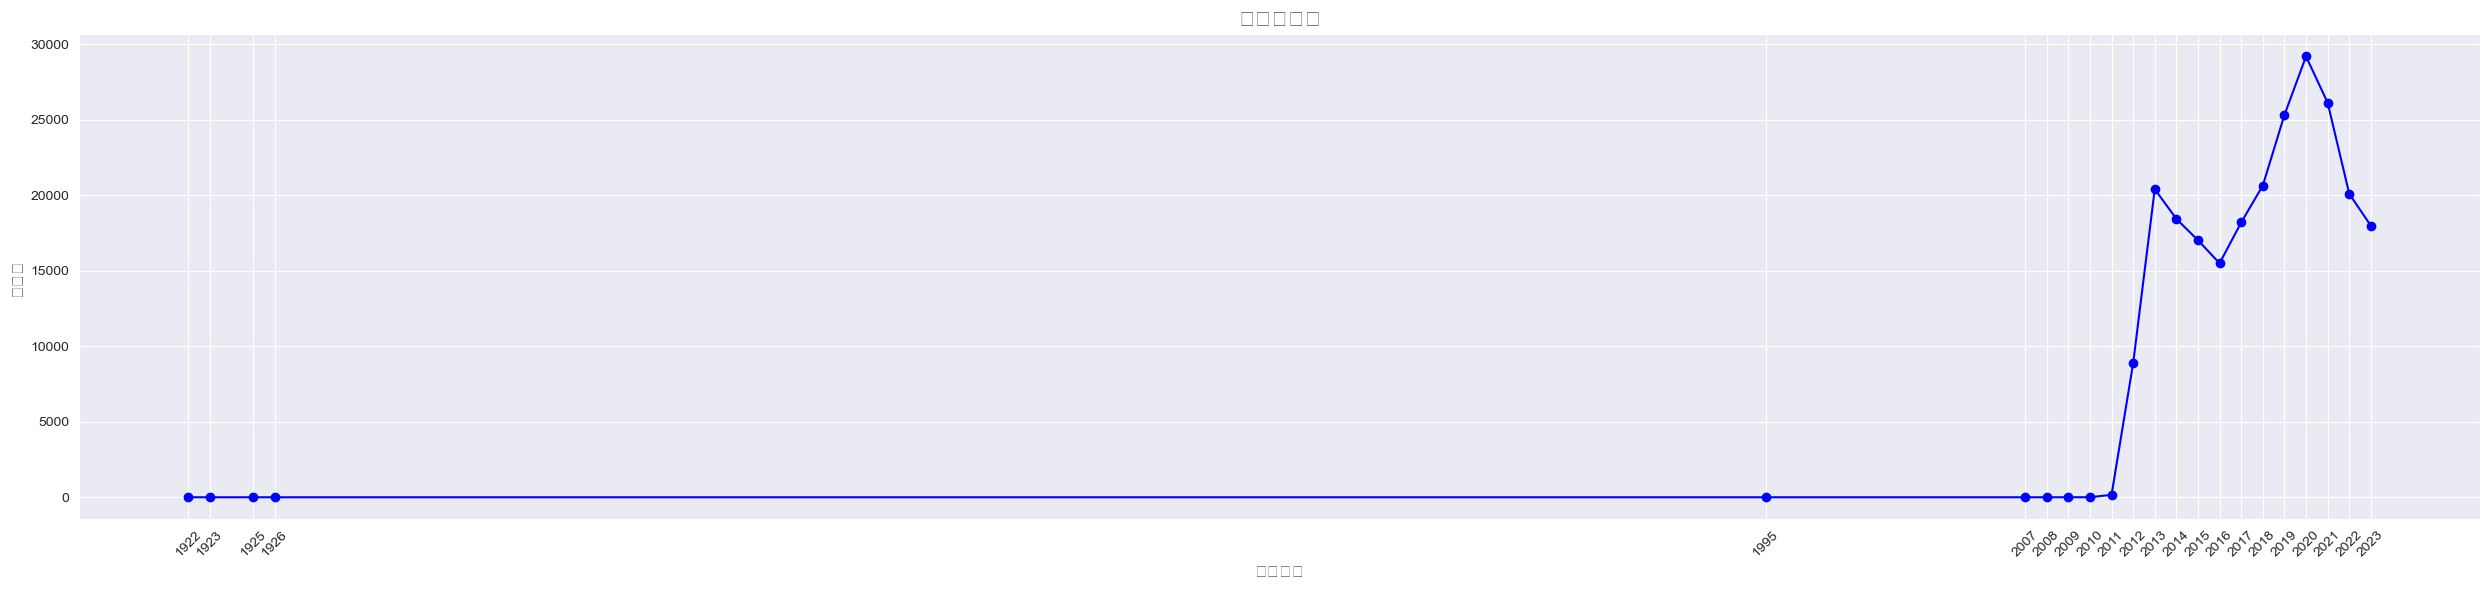

In [27]:
# 假設 df_columns_cleaned 已經包含數據，先將 '交易年月日' 轉換為 datetime 格式
df_columns_cleaned['交易年月日'] = pd.to_datetime(df_columns_cleaned['交易年月日'], errors='coerce')

# 提取年份並新增一個欄位 '交易年份'
df_columns_cleaned['交易年份'] = df_columns_cleaned['交易年月日'].dt.year

# 根據年份來統計每年的交易量
transactions_per_year = df_columns_cleaned.groupby('交易年份').size().reset_index(name='交易量')

# 繪製每年的交易量折線圖
plt.figure(figsize=(25, 6))
plt.plot(transactions_per_year['交易年份'], transactions_per_year['交易量'], marker='o', linestyle='-', color='b')
plt.title('每年交易量', fontsize=16)
plt.xlabel('交易年份', fontsize=12)
plt.ylabel('交易量', fontsize=12)
plt.grid(True)

# 設置X軸標籤並旋轉45度
plt.xticks(transactions_per_year['交易年份'], rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()

In [28]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df_columns_cleaned['交易年月日'] = pd.to_datetime(df_columns_cleaned['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_before_2022 = df_columns_cleaned[df_columns_cleaned['交易年月日'] < '2012-01-01']

# 查看結果
print(df_before_2022[['交易年月日']])

            交易年月日
34536  1926-06-23
34537  2011-05-15
34538  2011-06-14
34539  2011-06-23
34540  2011-05-31
...           ...
211596 2007-09-30
211597 2010-12-30
211598 2010-12-01
230371 2009-09-21
230372 2009-09-21

[178 rows x 1 columns]


In [29]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df_columns_cleaned['交易年月日'] = pd.to_datetime(df_columns_cleaned['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_after_2022 = df_columns_cleaned[df_columns_cleaned['交易年月日'] > '2012-01-01']

# 查看結果
print(df_after_2022[['交易年月日']])

            交易年月日
0      2022-09-02
1      2022-08-01
2      2022-08-04
3      2022-08-01
4      2022-08-01
...           ...
238007 2015-11-20
238008 2015-12-09
238009 2015-11-30
238010 2015-11-30
238011 2015-11-25

[237829 rows x 1 columns]


In [30]:
df_columns_cleaned = df_columns_cleaned[df_columns_cleaned['交易年月日'] >= '2012-01-01']

In [31]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237832 entries, 0 to 238011
Data columns (total 47 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   鄉鎮市區         237832 non-null  object        
 1   土地位置建物門牌     237832 non-null  object        
 2   交易年月日        237832 non-null  datetime64[ns]
 3   建築完成年月       212559 non-null  float64       
 4   建物移轉總面積平方公尺  237832 non-null  float64       
 5   有無管理組織       237832 non-null  object        
 6   總價元          237832 non-null  int64         
 7   單價元平方公尺      237832 non-null  float64       
 8   備註           65379 non-null   object        
 9   編號           237832 non-null  object        
 10  緯度           237832 non-null  float64       
 11  經度           237832 non-null  float64       
 12  bad_count    237832 non-null  float64       
 13  good_count   237832 non-null  float64       
 14  建築型態清整       237832 non-null  object        
 15  陽台有無         237832 non-null  int64    

# 屋齡與屋齡區間

In [32]:
# 提取小數點前的部分，去掉前四位，保留從第五位開始的數字作為「建築完成年」
df_columns_cleaned['建築完成年'] = df_columns_cleaned['建築完成年月'].apply(lambda x: str(int(float(x)))[0:-4] if pd.notna(x) and str(x).replace('.0', '').isdigit() else '0')

# 將空字串替換為 '0'
df_columns_cleaned['建築完成年'] = df_columns_cleaned['建築完成年'].replace('', '0')

# 將「建築完成年」轉換成整數類型
df_columns_cleaned['建築完成年'] = df_columns_cleaned['建築完成年'].astype(int)

# 查看結果
print(df_columns_cleaned[['建築完成年月', '建築完成年']].head(10))
print(df_columns_cleaned[['建築完成年']].dtypes)

      建築完成年月  建築完成年
0   840704.0     84
1   640322.0     64
2   890919.0     89
3   650600.0     65
4   510000.0     51
5   810813.0     81
6   850916.0     85
7   960719.0     96
8   820526.0     82
9  1110412.0    111
建築完成年    int64
dtype: object


In [33]:
column_values = sorted(df_columns_cleaned['交易年份'].unique())
# print(column_values)
# 提取年份，並轉換為民國年
df_columns_cleaned['交易年_民國'] = df_columns_cleaned['交易年份']- 1911

# 查看結果
print(df_columns_cleaned[['交易年份', '交易年_民國']].tail(20))

        交易年份  交易年_民國
237992  2015     104
237993  2015     104
237994  2015     104
237995  2015     104
237996  2015     104
237997  2015     104
237998  2015     104
237999  2015     104
238000  2015     104
238001  2015     104
238002  2015     104
238003  2015     104
238004  2015     104
238005  2015     104
238006  2015     104
238007  2015     104
238008  2015     104
238009  2015     104
238010  2015     104
238011  2015     104


In [34]:
df_columns_cleaned['屋齡'] = df_columns_cleaned['交易年_民國'] - df_columns_cleaned['建築完成年']

In [35]:
df_columns_cleaned['屋齡'].unique()

array([ 27,  47,  22,  46,  60,  30,  26,  15,  29,   0,  53,  28,   5,
        18,  45,  32,  35,  41,  19,   2,  39, 111,  31,  54,  34,  42,
        44,  43,   4,   1,  16,   9,  36,  33,  25,  24,  23,  14,   3,
        48,  11,  52,  37,   7,  38,  40,   6,   8,  61,  49,  17,  21,
        10,  13,  51,  76,  12,  50,  55,  56,  20,  62, 108,  88,  63,
        58,  65,  97,  87,  66,  90,  71,  59,  72,  69,  86,  74,  57,
        68,  81,  91,  64,  70,  -1,  -2,  96,  -3,  -4,  80,  79, 105,
        73, 100, 102,  78,  95,  93,  67, 112,  82,  75,  99, 107,  83,
        85,  92, 103,  94,  89,  -5, 106, 104, 101, 109,  77, 110,  84,
        -7,  98])

In [36]:
# 定義屋齡區間
bins = [-float('inf'), 3, 12, 21, 30, float('inf')]
labels = ['未滿3年', '3年以上－未滿12年', '12年以上－未滿21年', '21年以上－未滿30年', '30年以上']

# 使用 pd.cut() 進行分類並加上標籤
df_columns_cleaned['屋齡區間'] = pd.cut(df_columns_cleaned['屋齡'], bins=bins, labels=labels)

# 檢查結果
print(df_columns_cleaned[['屋齡', '屋齡區間']].head(10))

   屋齡         屋齡區間
0  27  21年以上－未滿30年
1  47        30年以上
2  22  21年以上－未滿30年
3  46        30年以上
4  60        30年以上
5  30  21年以上－未滿30年
6  26  21年以上－未滿30年
7  15  12年以上－未滿21年
8  29  21年以上－未滿30年
9   0         未滿3年


In [37]:
df_columns_cleaned.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間'],
      dtype='object')

In [38]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237832 entries, 0 to 238011
Data columns (total 51 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   鄉鎮市區         237832 non-null  object        
 1   土地位置建物門牌     237832 non-null  object        
 2   交易年月日        237832 non-null  datetime64[ns]
 3   建築完成年月       212559 non-null  float64       
 4   建物移轉總面積平方公尺  237832 non-null  float64       
 5   有無管理組織       237832 non-null  object        
 6   總價元          237832 non-null  int64         
 7   單價元平方公尺      237832 non-null  float64       
 8   備註           65379 non-null   object        
 9   編號           237832 non-null  object        
 10  緯度           237832 non-null  float64       
 11  經度           237832 non-null  float64       
 12  bad_count    237832 non-null  float64       
 13  good_count   237832 non-null  float64       
 14  建築型態清整       237832 non-null  object        
 15  陽台有無         237832 non-null  int64    

In [39]:
df_columns_cleaned.isna().sum()

鄉鎮市區                0
土地位置建物門牌            0
交易年月日               0
建築完成年月          25273
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172453
編號                  0
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4755
格局比例_廳           4755
格局比例_衛           4755
格局比例_隔間          4755
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
建物移轉總面積坪            0
單價元每坪               0
房地總價元(坪)  

In [40]:
# 填補數值型特徵的缺失值
numeric_cols_with_na = ['格局比例_衛', '格局比例_廳', '格局比例_房','格局比例_隔間']
for col in numeric_cols_with_na:
    df_columns_cleaned[col].fillna(df_columns_cleaned[col].median(), inplace=True)

In [41]:
df_columns_cleaned.isna().sum()

鄉鎮市區                0
土地位置建物門牌            0
交易年月日               0
建築完成年月          25273
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172453
編號                  0
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房              0
格局比例_廳              0
格局比例_衛              0
格局比例_隔間             0
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
建物移轉總面積坪            0
單價元每坪               0
房地總價元(坪)  

In [42]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237832 entries, 0 to 238011
Data columns (total 51 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   鄉鎮市區         237832 non-null  object        
 1   土地位置建物門牌     237832 non-null  object        
 2   交易年月日        237832 non-null  datetime64[ns]
 3   建築完成年月       212559 non-null  float64       
 4   建物移轉總面積平方公尺  237832 non-null  float64       
 5   有無管理組織       237832 non-null  object        
 6   總價元          237832 non-null  int64         
 7   單價元平方公尺      237832 non-null  float64       
 8   備註           65379 non-null   object        
 9   編號           237832 non-null  object        
 10  緯度           237832 non-null  float64       
 11  經度           237832 non-null  float64       
 12  bad_count    237832 non-null  float64       
 13  good_count   237832 non-null  float64       
 14  建築型態清整       237832 non-null  object        
 15  陽台有無         237832 non-null  int64    

In [43]:
df_columns_cleaned.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_237832row_cleaned.csv',index=False)

In [44]:
df_facilities = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_237832row_cleaned_facilities.csv') 
df_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237832 entries, 0 to 237831
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  237832 non-null  object 
 1   土地位置建物門牌              237832 non-null  object 
 2   交易年月日                 237832 non-null  object 
 3   建築完成年月                212559 non-null  float64
 4   建物移轉總面積平方公尺           237832 non-null  float64
 5   有無管理組織                237832 non-null  object 
 6   總價元                   237832 non-null  int64  
 7   單價元平方公尺               237832 non-null  float64
 8   備註                    65379 non-null   object 
 9   編號                    237832 non-null  object 
 10  緯度                    237832 non-null  float64
 11  經度                    237832 non-null  float64
 12  bad_count             237832 non-null  float64
 13  good_count            237832 non-null  float64
 14  建築型態清整                237832 non-null  object 
 15  

In [45]:
df_2024 = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_28195row_cleaned_2024.csv') 
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28187 entries, 0 to 28186
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   鄉鎮市區                  28187 non-null  object 
 1   土地位置建物門牌              28187 non-null  object 
 2   交易年月日                 28187 non-null  object 
 3   建築完成年月                19438 non-null  float64
 4   建物移轉總面積平方公尺           28187 non-null  float64
 5   有無管理組織                28187 non-null  object 
 6   總價元                   28187 non-null  int64  
 7   單價元平方公尺               28187 non-null  float64
 8   備註                    13116 non-null  object 
 9   編號                    28187 non-null  object 
 10  緯度                    28187 non-null  float64
 11  經度                    28187 non-null  float64
 12  房地總價元                 28187 non-null  int64  
 13  格局比例_房                28187 non-null  float64
 14  格局比例_廳                28187 non-null  float64
 15  格局比例_衛             

## 先確認df_facilities的欄位在df_2024中都有


In [46]:
# 獲取 df_facilities 和 df_2024 的欄位列表
facilities_columns = df_facilities.columns
df_2024_columns = df_2024.columns

# 找出 df_facilities 中不在 df_2024 的欄位
missing_columns = [col for col in facilities_columns if col not in df_2024_columns]

# 顯示結果
if missing_columns:
    print(f"以下欄位在 df_2024 中缺失：{missing_columns}")
else:
    print("df_facilities 的所有欄位都在 df_2024 中存在。")


df_facilities 的所有欄位都在 df_2024 中存在。


In [47]:
# 獲取 df_facilities 和 df_2024 的欄位列表
facilities_columns = df_facilities.columns
df_2024_columns = df_2024.columns

# 找出 df_facilities 中不在 df_2024 的欄位
missing_columns = [col for col in df_2024_columns if col not in facilities_columns]

# 顯示結果
if missing_columns:
    print(f"以下欄位在 facilities_columns 中缺失：{missing_columns}")
else:
    print(" df_2024 的所有欄位都在 df_facilities 中存在。")

 df_2024 的所有欄位都在 df_facilities 中存在。


In [48]:

# unique_values = df_facilities['建築型態清整'].unique()

# # 列出所有不一樣的值
# print("以下是欄位 '建築型態清整' 中的所有不一樣的值：")
# print(unique_values)

In [49]:


# # 確認 '都市土地使用分區_清整' 欄位中的所有唯一值
# unique_values = df_2024['都市土地使用分區_清整'].unique()

# # 列出所有不一樣的值
# print("以下是欄位 '都市土地使用分區_清整' 中的所有不一樣的值：")
# print(unique_values)


In [50]:
# # 確認 '都市土地使用分區_清整' 欄位中的所有唯一值
# unique_values = df_2024['其他'].unique()

# # 列出所有不一樣的值
# print("以下是欄位 '其他' 中的所有不一樣的值：")
# print(unique_values)

In [51]:
import pandas as pd

# 假設 df_facilities 和 df_2024 是你的兩個 DataFrame
df_combined = pd.concat([df_facilities, df_2024], ignore_index=True)

In [52]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266019 entries, 0 to 266018
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  266019 non-null  object 
 1   土地位置建物門牌              266019 non-null  object 
 2   交易年月日                 266019 non-null  object 
 3   建築完成年月                231997 non-null  float64
 4   建物移轉總面積平方公尺           266019 non-null  float64
 5   有無管理組織                266019 non-null  object 
 6   總價元                   266019 non-null  int64  
 7   單價元平方公尺               266019 non-null  float64
 8   備註                    78495 non-null   object 
 9   編號                    266019 non-null  object 
 10  緯度                    266019 non-null  float64
 11  經度                    266019 non-null  float64
 12  bad_count             266019 non-null  float64
 13  good_count            266019 non-null  float64
 14  建築型態清整                266019 non-null  object 
 15  

In [53]:
df_combined.isna().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   34022
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      187524
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

In [54]:
df_combined.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_266019row_cleaned.csv',index=False)